In [1]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import matplotlib.patches as mpatches

%matplotlib inline

In [647]:
os.chdir("/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Data") # Sets working directory
dftur = pd.read_csv("az_pc_tur.csv")
dfcen = pd.read_csv("az_pc_cen.csv")

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

test = ax.plane(StrikeUC, DipUC, c='lightgreen')
ax.pole(StrikeUC,DipUC,c='lightgreen')
ax.density_contourf(StrikeUC, DipUC, measurement='poles', cmap='binary')

# foldstrike, folddip = mplstereonet.fit_girdle(StrikeUC, DipUC)
# ax.plane(foldstrike,folddip,c='k',linestyle='dashed')
# plunge, bearing = mplstereonet.pole2plunge_bearing(foldstrike,folddip)
# ax.plane(bearing,plunge,c='r')

ax.plane(StrikeLC, DipLC, c='seagreen')
ax.pole(StrikeLC,DipLC,c='seagreen')
ax.density_contourf(StrikeLC, DipLC, measurement='poles', cmap='binary')

ax.plane(StrikeUJ, DipUJ, c='royalblue')
ax.pole(StrikeUJ,DipUJ,c='royalblue')
ax.density_contourf(StrikeLC, DipLC, measurement='poles', cmap='binary')

StrikeUClabel = mpatches.Patch(color='lightgreen')
StrikeLClabel = mpatches.Patch(color='seagreen')
StrikeUJlabel = mpatches.Patch(color='royalblue')
ax.legend((StrikeUJlabel, StrikeLClabel, StrikeUClabel),('UJ','LC','UC'), 
          loc='lower center', ncol=3,bbox_to_anchor=(0.5,-0.16), fontsize=12)
ax.grid()

plt.title('Mesozoic Structure', pad=30, fontsize=14)
plt.savefig('az_stereonet_all.png', dpi=400,bbox_inches='tight')

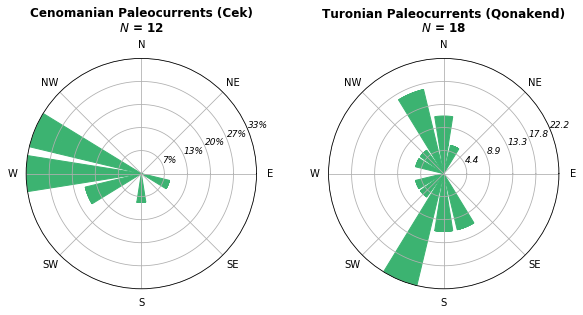

In [699]:
from windrose import WindroseAxes
from matplotlib.projections import register_projection
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter

bins = np.arange(0., 360., 22.5)
dfcen['freq'] = dfcen.groupby(['PC', pd.cut(dfcen.PC, bins)])['PC'].transform('count')
dftur['freq'] = dftur.groupby(['PC', pd.cut(dftur.PC, bins)])['PC'].transform('count')

fig=plt.figure()
rect=[0,0,0.8,0.8] 
wa=WindroseAxes(fig, rect)
fig.add_axes(wa)
wa.bar(dfcen.PC, dfcen.PC, nsector=16,normed=True, color='mediumseagreen',edgecolor='k')
wa.set_title('Cenomanian Paleocurrents (Cek)\n${N}$ = 12',weight='bold',pad=15)
wa.set_radii_angle(angle=22.5,fontsize=9,fontstyle='italic',zorder=0)
wa.set_thetagrids(np.arange(0.,360.,45),labels=['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])
wa.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

rect1=[0.7, 0, 0.8, 0.8]
wa1=WindroseAxes(fig, rect1)
fig.add_axes(wa1)
wa1.bar(dftur.PC,dftur.PC, nsector=16,normed=True,color='mediumseagreen', edgecolor='k')
wa1.set_title('Turonian Paleocurrents (Qonakend)\n${N}$ = 18',weight='bold',pad=15)
wa1.set_radii_angle(angle=22.5,fontsize=9,fontstyle='italic',zorder=0)
wa1.set_thetagrids(np.arange(0.,360.,45),labels=['E', 'NE', 'N', 'NW', 'W', 'SW', 'S', 'SE'])

plt.savefig('/Users/euan-soutter/Desktop/Python/Field_Data/Azerbaijan/Figs/az_rose.png', dpi=400,bbox_inches='tight')

In [637]:
dfcen.groupby('PC').size()

bins = np.arange(0., 360, 22.5)
dfcen_count, bins = np.histogram(dfcen.PC, bins=bins)
print(dfcen_count)
print(dfcen.PC)

[0 0 0 0 0 1 0 0 1 0 0 3 5 2 0]
0     290
1     294
2     188
3     114
4     300
5     276
6     270
7     266
8     250
9     288
10    279
11    252
Name: PC, dtype: int64


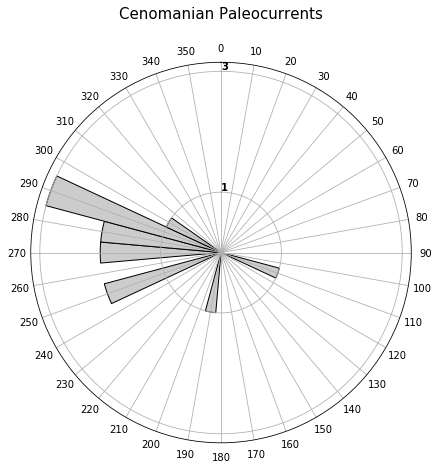

In [503]:
bins = np.arange(-5, 366, 10)
dfcen_c, bins = np.histogram(dfcen.PC, bins)
dfcen_c = np.sum(np.split(dfcen_c[:-1],1), 0)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), dfcen_c, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, dfcen_c.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Cenomanian Paleocurrents', y=1.10, fontsize=15)

plt.savefig('az_rose.png', dpi=400,bbox_inches='tight')